In [97]:
# Load housing data into DataFrame (Pandas reads & writes CSVs and many other data formats)
# data source: linked from https://ww2.amstat.org/publications/jse/v19n3/decock.pdf 

# Download this file to our Jupyter filesystem
!wget http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
# file is 'Tab Separated' with a generic extension, so tell Pandas which separator to use:  \t
df = pd.read_csv('AmesHousing.txt',sep='\t')

--2018-02-28 06:13:17--  http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving www.amstat.org (www.amstat.org)... 50.205.225.65
Connecting to www.amstat.org (www.amstat.org)|50.205.225.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt [following]
--2018-02-28 06:13:17--  https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving ww2.amstat.org (ww2.amstat.org)... 50.205.225.74
Connecting to ww2.amstat.org (ww2.amstat.org)|50.205.225.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963738 (941K) [text/plain]
Saving to: ‘AmesHousing.txt.2’

AmesHousing.txt.2   100%[===================>] 941.15K   972KB/s    in 1.0s    

2018-02-28 06:13:19 (972 KB/s) - ‘AmesHousing.txt.2’ saved [963738/963738]



In [98]:
# DataFrames in Pandas are easy to sample or use head(n) or tail(n)

# df.head(3)
# df.tail(3)
df.sample(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
657,658,535377150,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,114000
264,265,907252120,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
1623,1624,527162080,60,RL,63.0,7875,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,178750


In [99]:
# Wow, 82 is lots of columns - let's sort them so we can find what we're lookinvg for easier
df.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val',
       'Mo Sold', 'Neighborhood', 'Open Porch S

In [100]:
# Maybe we want to grab just a subset of data columns - it's easy with Pandas. 
# Don't forget the double [[]] syntax for multiple selections

df2 = df[['SalePrice','Lot Area','Bedroom AbvGr','Year Built','Yr Sold','1st Flr SF', '2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2']]
df2.head(3)

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2
0,215000,31770,3,1960,2010,1656,0,639.0,0.0
1,105000,11622,2,1961,2010,896,0,468.0,144.0
2,172000,14267,3,1958,2010,1329,0,923.0,0.0


In [101]:
# Pandas maybe you want to engineer a new aggregate feature column
# It's easy to do opeations across columns (eg. add all the Square Footage columns into a new one 'Total SF')
df3 = pd.DataFrame(df2['1st Flr SF']+df2['2nd Flr SF']+df2['BsmtFin SF 1']+df2['BsmtFin SF 2'], columns=['Total SF'])
df3.head(10)

,Total SF
0,2295.0
1,1508.0
2,2252.0
3,3175.0
4,2420.0
5,2206.0
6,1954.0
7,1543.0
8,2796.0
9,1804.0


In [102]:
# Combining DataFrame's is easy to
# use 'axis=1' for adding columns (features); 'axis=0' for more rows (examples)
df4 = pd.concat([df2,df3],axis=1) 
df4.sample(3) # <-- now we have a new 'Total SF' feature column appended

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2,Total SF
951,173000,9360,2,1977,2009,1287,0,841.0,116.0,2244.0
2578,141000,14850,2,1957,2006,1092,0,895.0,0.0,1987.0
832,275000,12800,2,1989,2009,1644,0,1518.0,0.0,3162.0


In [103]:
# Logistic Regression
# Let's see if we can predict a Sale Price based on single feature 'Gross Living Area'
# Create a new DataFrame with only the data we need
data = df[['SalePrice','Gr Liv Area']]
data.head(5)

,SalePrice,Gr Liv Area
0,215000,1656
1,105000,896
2,172000,1329
3,244000,2110
4,189900,1629


<IPython.core.display.Javascript object>


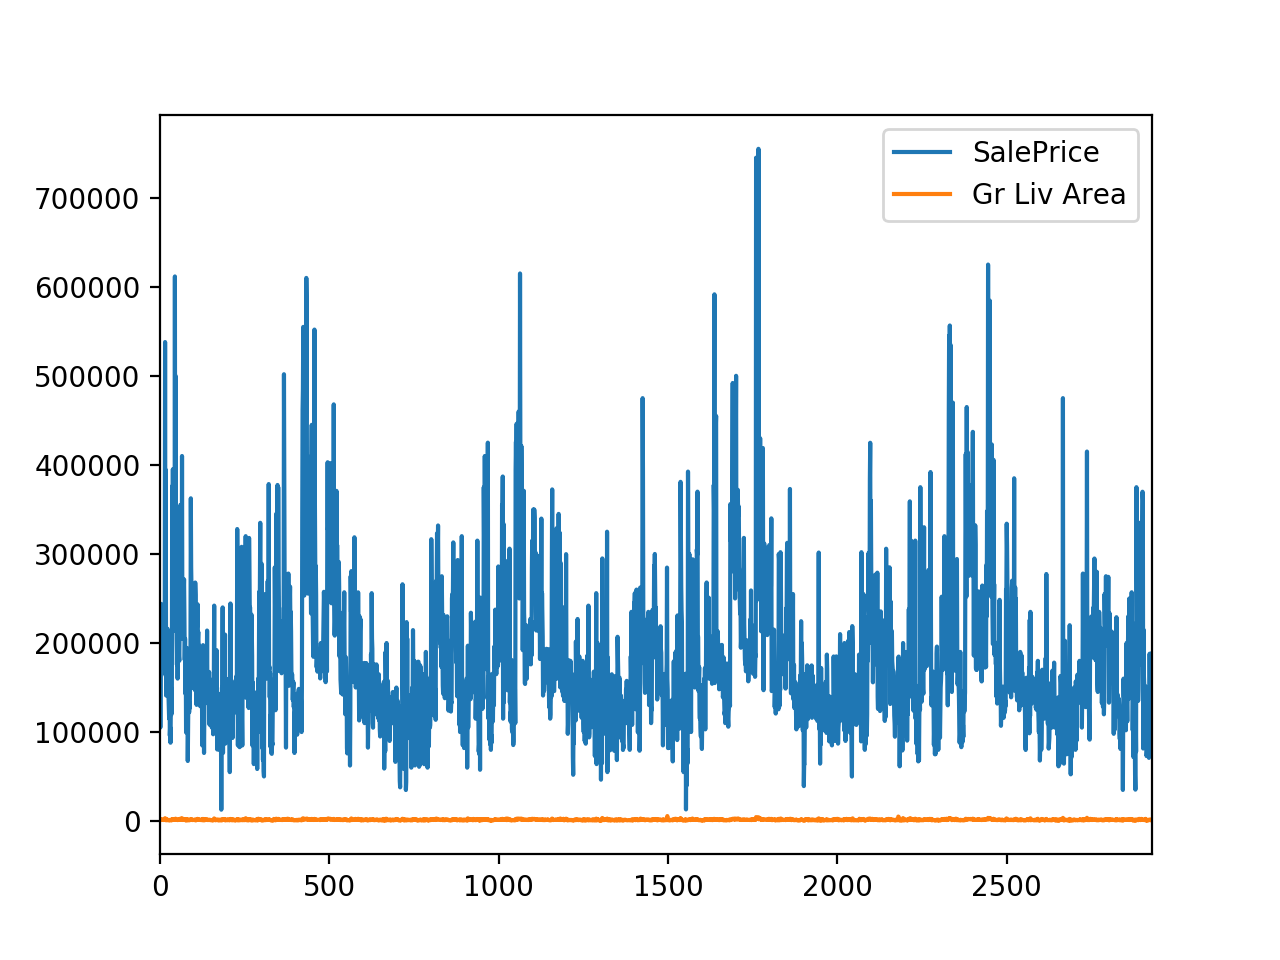

In [105]:
%matplotlib notebook
data.plot()
# data.plot(kind='line',logy=True) # <-- maybe we should try log scaling if we're visualizing different data scales



In [121]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature 'Total SF' to predict 'SalePrice'
X = data['Gr Liv Area'].values.reshape(-1,1) #sklearn complains if these are shape [100,] vs [100,1]
y = data['SalePrice'].values.reshape(-1,1)

<IPython.core.display.Javascript object>


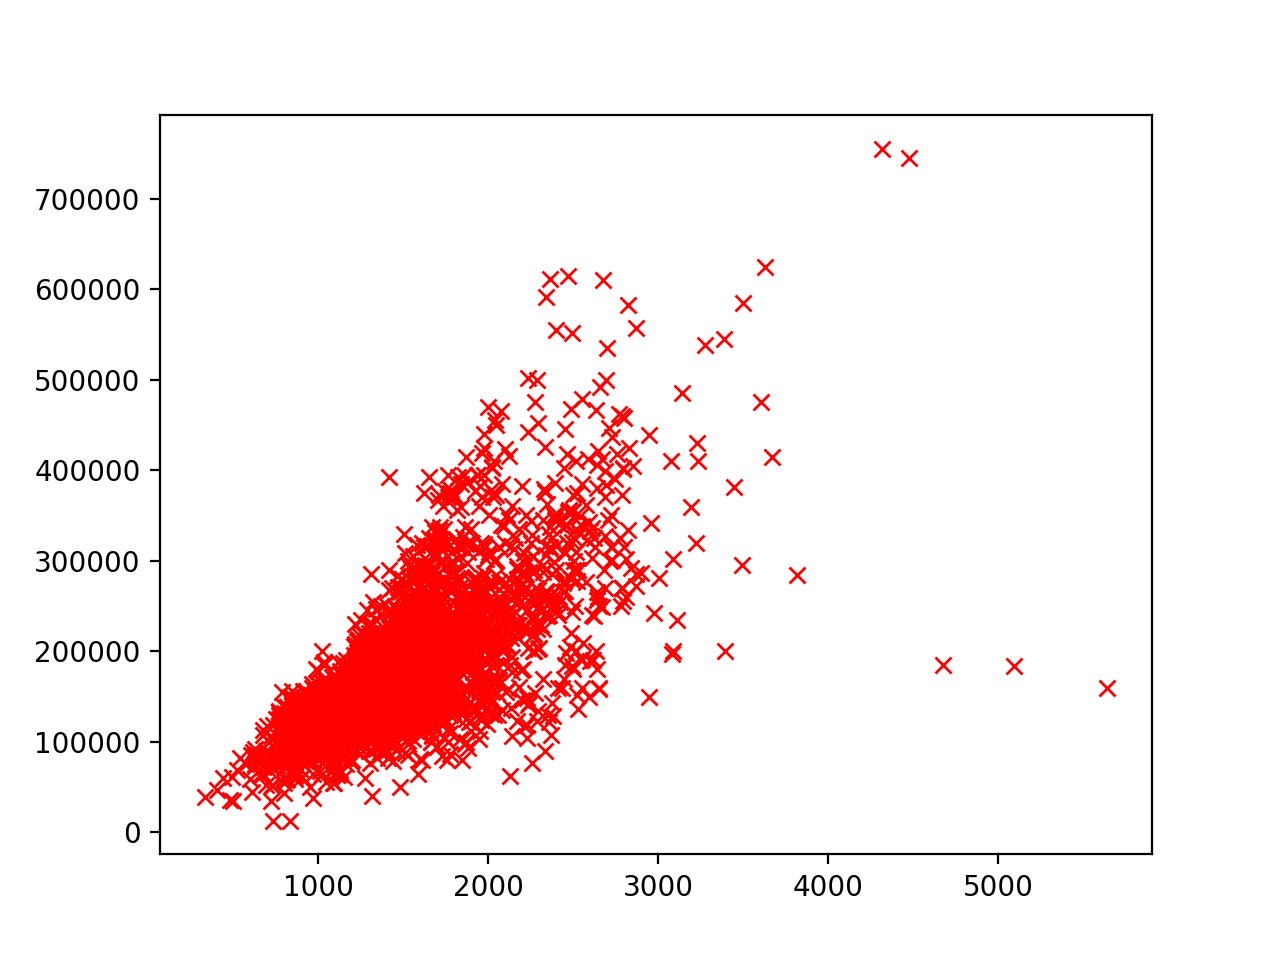

In [134]:
%matplotlib notebook
# Let's plot Square Foot vs Sale Price to understand our data
plt.plot(X,y,'rx')

In [135]:
# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
housing_X_train, housing_X_test, housing_y_train, housing_y_test = train_test_split(X,y)
print('housing_X_train',len(housing_X_train),'examples')
print('housing_X_test',len(housing_X_test),'examples')
print('housing_y_train',len(housing_y_train),'examples')
print('housing_y_test',len(housing_y_test),'examples')

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)
# regr = linear_model.SGDRegressor(n_iter=100)


housing_X_train 2197 examples
housing_X_test 733 examples
housing_y_train 2197 examples
housing_y_test 733 examples


In [136]:
# Exporting CSVs is easy too
# data.to_csv('housing_sf_price.tsv',sep='\t',)

In [137]:
# Train the model using the training setst
regr.fit(housing_X_train, housing_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [138]:
# Make predictions using the testing set
housing_y_pred = regr.predict(housing_X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(housing_y_test, housing_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(housing_y_test, housing_y_pred))



Mean squared error: 3709629073.10
Variance score: 0.51


<IPython.core.display.Javascript object>


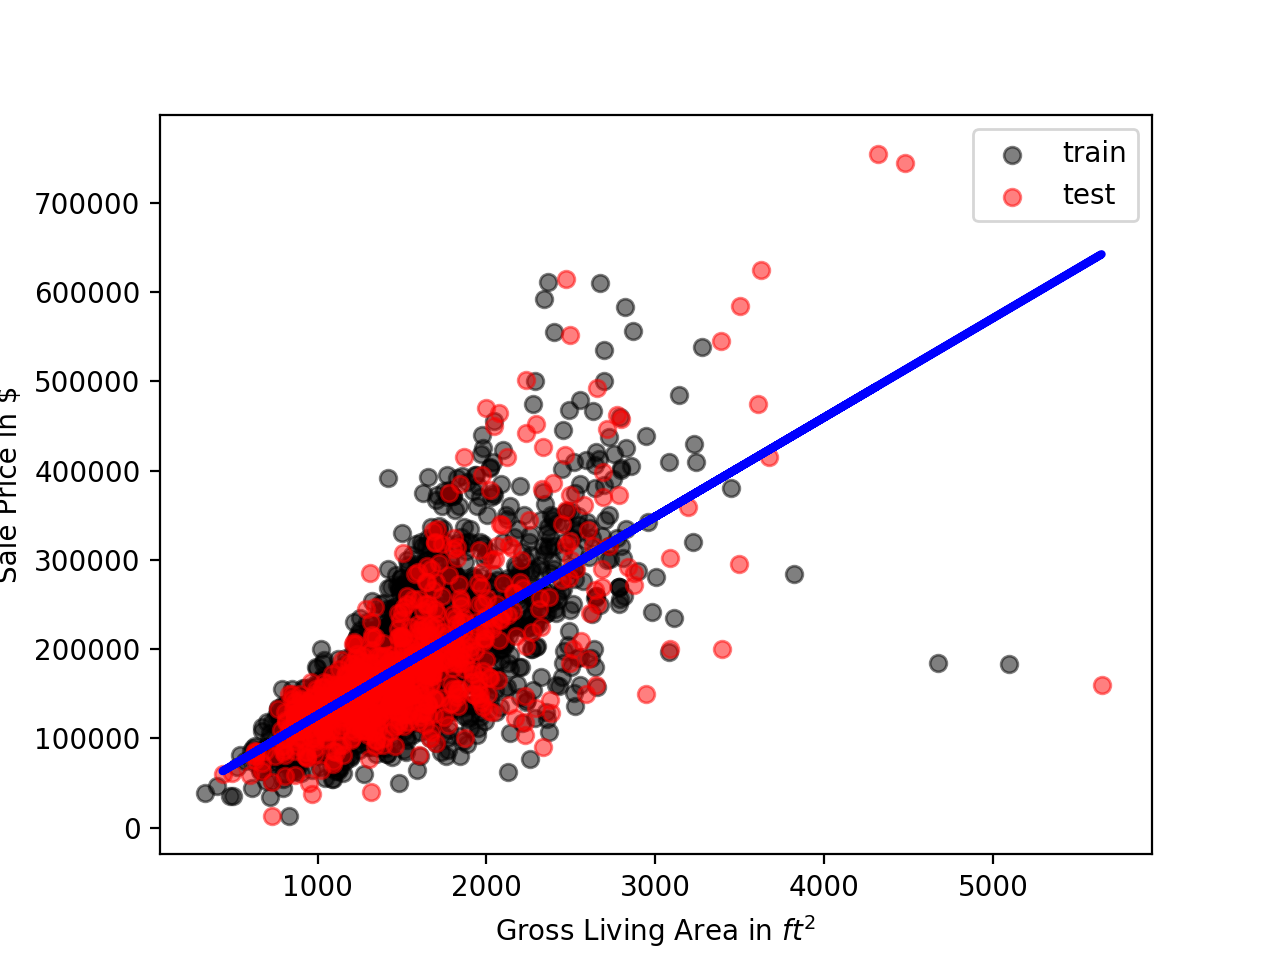

In [139]:
%matplotlib notebook

# Plot outputs
plt.scatter(housing_X_train, housing_y_train, alpha=.5, color='black', label='train')
plt.scatter(housing_X_test, housing_y_test, alpha=.5, color='red', label='test')
plt.plot(housing_X_test, housing_y_pred,color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.legend()
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')

plt.show()